<a href="https://colab.research.google.com/github/sonalsrivas/Attendance-Project/blob/master/XGBooster_Concrete_Strength.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **XGBooster algorithm** is a kind of boosting ensemble learning where not one but many machine learning models are used to arrive at a more accurate model by starting from one and subsequently fix the errors in the next model and so on.


*A FANTASTIC INTRO HERE - https://towardsdatascience.com/random-forest-and-its-implementation-71824ced454f*

Ensemble Learning-> Boosting and Bootstraping



In [157]:
import os
from google.colab import drive
#drive.mount('/content/gdrive')
#print(os.listdir(r'/content/gdrive/My Drive'))
drive.mount('/content/gdrive')
print(os.listdir(r'/content/gdrive/My Drive/Colab Notebooks'))


# Importing the libraries
import numpy as np
import pandas as pd

#Importing Data
#data1=pd.read_excel("/content/gdrive/My Drive/Concrete Data-Stone-Dust.xlsx")
#data1=pd.read_excel("/content/gdrive/My Drive/Colab Notebooks/Concrete Data-Stone-Dust.xlsx")
#data1=pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/Concrete Data-Stone-Dust-NEW.csv")
data1=pd.read_excel("/content/gdrive/My Drive/Colab Notebooks/basicshit.xlsx")
#### CAN BE CHANGED
data1.columns = ['cement','furnace_slag','fly_ash','water', 'super_plasticizer','coarse_agg','fine_agg','stone_dust','age','compressive_strength']


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
['Conversion Word Problems.ipynb', 'General.ipynb', 'Numeral Unit Separation.ipynb', 'ConversionWordProblemsMP.ipynb', 'Untitled', 'Untitled0.ipynb', 'NumeralUnitSeparationMP.ipynb', 'main.ipynb', 'Copy of main.ipynb', 'Word Number.ipynb', 'Corrected Main2.ipynb', 'type of series Program.ipynb', 'Up and Running Main.ipynb', 'TwitterSentiment_AV_test_tweets_anuFYb8.csv', 'TwitterSentiment_AV_train_E6oV3lV.csv', 'Untitled1.ipynb', 'TwitterSentimentAnalysiswithTFIDF.ipynb', 'Tetris Project.ipynb', 'Untitled2.ipynb', 'Untitled3.ipynb', 'codechef july challenge 2020 practice.ipynb', 'Garvit Solution.ipynb', 'Untitled4.ipynb', 'introqcqh-lab-1.zip', 'lab-1.ipynb', 'Untitled5.ipynb', 'Sept2020 Codechef Long.ipynb', 'DATA-RS-1-BLANK.gsheet', 'DATA-RS-1-BLANK - Table.csv', 'DATA-RS-1-BLANK - Table.gsheet', 'Dad ANN.xlsx', 'ANN classification Dads Data.ipynb', 'ANN l

In [158]:
data1.fillna(0)
print("Number of rows    :",data1.shape[0])
print("Number of columns :",data1.shape[1])
#for colname in data1.columns:
#  for val in data1[colname]:
#    if type(val) != (float):
#      print(colname, type(val))
#  print(f"checked {colname}")

Number of rows    : 1687
Number of columns : 10


In [159]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from xgboost.sklearn import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score

## Parameters of train_test_split
**test_size**: to specify the percentage of data instances taken as test divided by 100; default is 0.25

**random_state**: an integer explicitely passed here would lead to you having a reproducible splitting of the dataset; not specifying this argument would lead to it being set to np.random.RandomState which is a mersenne twister.


In [160]:
dataSet=data1
#Splitting train and test data
from sklearn.model_selection import train_test_split
#from sklearn.model_selection import cross_val_score
train,test = train_test_split(dataSet, test_size = 0.3, random_state = 123)
train_X = train[[x for x in train.columns if x not in ["compressive_strength"]]]# + ["age_months"]]]
train_Y = train["compressive_strength"]
test_X  = test[[x for x in test.columns if x not in ["compressive_strength"]]]# + ["age_months"]]]
test_Y  = test["compressive_strength"]

## Libraries for plot graph presentation

In [161]:
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
%matplotlib inline

**Mean Squared Error (MSE)** : the mean squared difference between the estimated values and the actual value.

**R square score** : the proportion of the variance in the dependent variable that is predictable from the independent variable.

**What is a good r2 score?**
It depends on your research work but more then 50%, R2 value with low RMES value is acceptable to scientific research community, Results with low R2 value of 25% to 30% are valid because it represent your findings.

--------------------------------------------

**RandomForestRegressor Parameter**

n_estimator : specifies the number of decision trees in the random forest; default value is 100.

--------------------------------------------

**plt.figure Parameter**

figsize: specify widh and height in inches




In [162]:
xgr = XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.4, max_delta_step=0,
             max_depth=5, min_child_weight=1, missing=None, n_estimators=400,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)
'''
xgr = XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.2, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=200,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)
'''
xgr.fit(train_X,train_Y)

predict_train_Y = xgr.predict(train_X)

r2_train=r2_score(train_Y, predict_train_Y)
rms=np.sqrt(mean_squared_error(train_Y,predict_train_Y))
print("Root Mean Squared Error :",rms,"\nR2 Score :",r2_train)



predict_test_Y = xgr.predict(test_X)

r2_test=r2_score(test_Y, predict_test_Y)
rms=np.sqrt(mean_squared_error(test_Y,predict_test_Y))
print("Root Mean Squared Error :",rms,"\nR2 Score :",r2_test)




'''
predict_train_Y= model.predict(train_X)
r2score=("%.2f" % r2_score(train_Y,predict_train_Y))
rms=np.sqrt(mean_squared_error(train_Y,predict_train_Y))
print("train error:\nR2\t:",r2score,"\nRMS\t:",rms,"\n")

predict_test_Y= model.predict(test_X)
r2score=("%.2f" % r2_score(test_Y,predict_test_Y))
rms=np.sqrt(mean_squared_error(test_Y,predict_test_Y))
print("test error:\nR2\t:",r2score,"\nRMS\t:",rms,"\n")

print("comparision b/w predicted value and actual test value ")

plt.figure(figsize=(13,28))
plt.subplot(211)
prediction = pd.DataFrame(predict_test_Y)  
testy = test_Y.reset_index()["compressive_strength"]
    
ax = testy.plot(label="originals",figsize=(12,13),linewidth=2)
ax = prediction[0].plot(label = "predictions",figsize=(12,13),linewidth=2)

plt.legend(loc="best")
plt.title("ORIGINALS VS PREDICTIONS")
plt.xlabel("entries")
plt.ylabel("values")
ax.set_facecolor("k")
'''

[09:17:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Root Mean Squared Error : 0.13592237207837918 
R2 Score : 0.9999155701122975
Root Mean Squared Error : 3.5839838698810276 
R2 Score : 0.9395688996172532


'\npredict_train_Y= model.predict(train_X)\nr2score=("%.2f" % r2_score(train_Y,predict_train_Y))\nrms=np.sqrt(mean_squared_error(train_Y,predict_train_Y))\nprint("train error:\nR2\t:",r2score,"\nRMS\t:",rms,"\n")\n\npredict_test_Y= model.predict(test_X)\nr2score=("%.2f" % r2_score(test_Y,predict_test_Y))\nrms=np.sqrt(mean_squared_error(test_Y,predict_test_Y))\nprint("test error:\nR2\t:",r2score,"\nRMS\t:",rms,"\n")\n\nprint("comparision b/w predicted value and actual test value ")\n\nplt.figure(figsize=(13,28))\nplt.subplot(211)\nprediction = pd.DataFrame(predict_test_Y)  \ntesty = test_Y.reset_index()["compressive_strength"]\n    \nax = testy.plot(label="originals",figsize=(12,13),linewidth=2)\nax = prediction[0].plot(label = "predictions",figsize=(12,13),linewidth=2)\n\nplt.legend(loc="best")\nplt.title("ORIGINALS VS PREDICTIONS")\nplt.xlabel("entries")\nplt.ylabel("values")\nax.set_facecolor("k")\n'

Comparision between Predicted value and Actual test value 


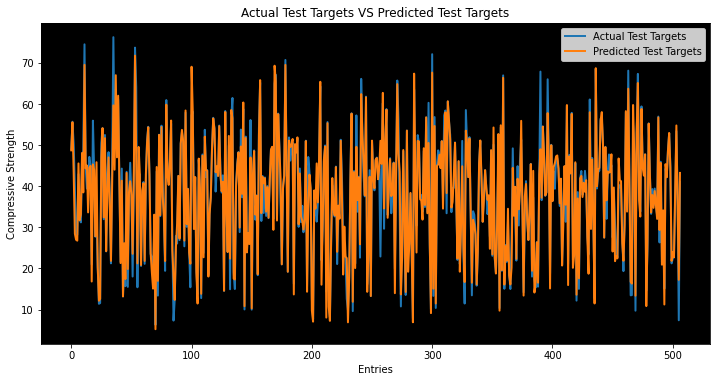

In [163]:

print("Comparision between Predicted value and Actual test value ")

plt.figure(figsize=(13,28))
plt.subplot(211)
prediction = pd.DataFrame(predict_test_Y)  
testy = test_Y.reset_index()["compressive_strength"]
   
ax = testy.plot(label="Actual Test Targets",figsize=(12,13),linewidth=2)
ax = prediction[0].plot(label = "Predicted Test Targets",figsize=(12,13),linewidth=2)

plt.legend(loc="best")
plt.title("Actual Test Targets VS Predicted Test Targets")
plt.xlabel("Entries")
plt.ylabel("Compressive Strength")
ax.set_facecolor("k")

In [164]:
'''
inputName=["cement","furnace_slag","fly_ash","water","super_plasticizer","coarse_agg","fine_agg","age"]
new=[]
for i in inputName:
  print(i,":",end='\t\t\t\t')
  new.append(float(input()))
new_X=np.array(new).reshape(1,-1)
predict_new_Y = xgr.predict(new_X)
print("Predicted Compressive Strength of Concrete => ",predict_new_Y)
'''

'\ninputName=["cement","furnace_slag","fly_ash","water","super_plasticizer","coarse_agg","fine_agg","age"]\nnew=[]\nfor i in inputName:\n  print(i,":",end=\'\t\t\t\t\')\n  new.append(float(input()))\nnew_X=np.array(new).reshape(1,-1)\npredict_new_Y = xgr.predict(new_X)\nprint("Predicted Compressive Strength of Concrete => ",predict_new_Y)\n'

## **Predict Concrete Strength**

In [165]:
'''
labels=['cement', 'furnace_slag', 'fly_ash', 'water', 'super_plasticizer','coarse_agg', 'fine_agg', 'age']
s=input().split(' ')
s1 = pd.Series([float(s[0])], name='cement')
s2 = pd.Series([float(s[1])], name='furnace_slag')
s3 = pd.Series([float(s[2])], name='fly_ash')
s4 = pd.Series([float(s[3])], name='water')
s5 = pd.Series([float(s[4])], name='super_plasticizer')
s6 = pd.Series([float(s[5])], name='coarse_agg')
s7 = pd.Series([float(s[6])], name='fine_agg')
s8 = pd.Series([float(s[7])], name='stone_dust')
s9 = pd.Series([float(s[8])], name='age')
new = pd.concat([s1, s2, s3, s4, s5, s6, s7, s8,s9], axis=1)
predictions=xgr.predict(new)
#print("CEMENT STRENTH:\r")
print("Predicted Composite Concrete Strength =",predictions[0],"MPa")
'''

'\nlabels=[\'cement\', \'furnace_slag\', \'fly_ash\', \'water\', \'super_plasticizer\',\'coarse_agg\', \'fine_agg\', \'age\']\ns=input().split(\' \')\ns1 = pd.Series([float(s[0])], name=\'cement\')\ns2 = pd.Series([float(s[1])], name=\'furnace_slag\')\ns3 = pd.Series([float(s[2])], name=\'fly_ash\')\ns4 = pd.Series([float(s[3])], name=\'water\')\ns5 = pd.Series([float(s[4])], name=\'super_plasticizer\')\ns6 = pd.Series([float(s[5])], name=\'coarse_agg\')\ns7 = pd.Series([float(s[6])], name=\'fine_agg\')\ns8 = pd.Series([float(s[7])], name=\'stone_dust\')\ns9 = pd.Series([float(s[8])], name=\'age\')\nnew = pd.concat([s1, s2, s3, s4, s5, s6, s7, s8,s9], axis=1)\npredictions=xgr.predict(new)\n#print("CEMENT STRENTH:\r")\nprint("Predicted Composite Concrete Strength =",predictions[0],"MPa")\n'

In [166]:
#train_X =pd.DataFrame(train_X)
#test_X =pd.DataFrame(test_X)

#train_Y =pd.DataFrame(train_Y)
#test_Y =pd.DataFrame(test_Y)

pred_train_Y =pd.DataFrame(predict_train_Y)
pred_test_Y = pd.DataFrame(predict_test_Y)


XX=pd.concat([train_X,test_X],ignore_index=True)
YY=pd.concat([train_Y,test_Y],ignore_index=True)
RR=pd.concat([pred_train_Y,pred_test_Y],ignore_index=True)

XX.columns = ['cement','blast_furnace','fly_ash','water', 'superplasticizer','coarse_agg','fine_agg','stone_dust','age']#,'strength']

XX['Experimental_R']=YY
XX['ppp']=RR

XX.to_csv("prediction_results.csv")

In [167]:
predicted_data1=pd.read_csv("/content/prediction_results.csv")

Text(0.5, 0, 'Experimental_Result')

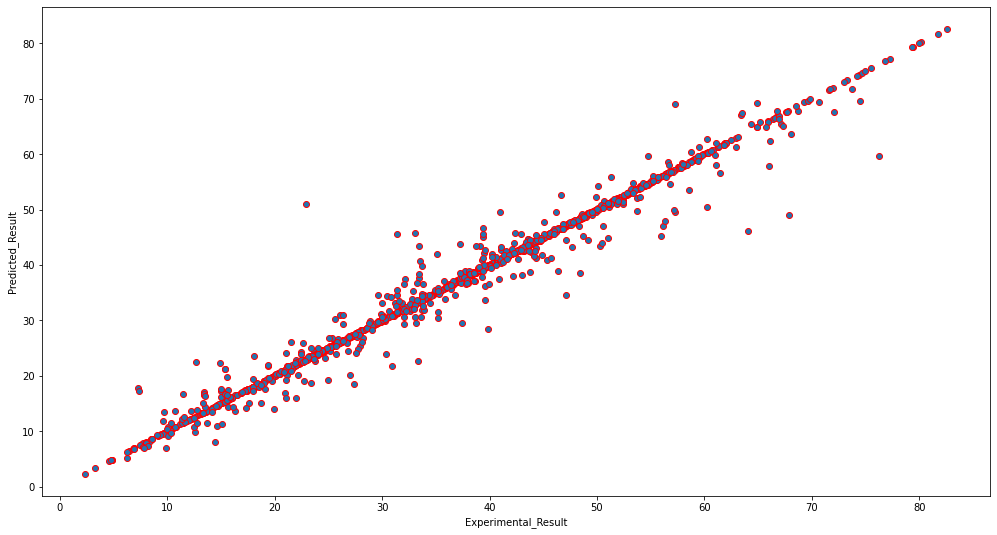

In [168]:
# scatter plot of Concrete Strength Experimented and XGPredicted
plt.figure(figsize=[17,9])
plt.scatter(y='ppp',x='Experimental_R',edgecolors='red',data=predicted_data1)
plt.ylabel('Predicted_Result')
plt.xlabel('Experimental_Result')


In [169]:
# Determined what rows are causing trouble

predicted_data1["Difference"] = predicted_data1["Experimental_R"] - predicted_data1["ppp"]
print(max(predicted_data1["Difference"]))
outlier_rows=[]
for i in predicted_data1.index:
  #print(i)
  if predicted_data1["Difference"][i]>9:
    print(i, predicted_data1["Difference"][i],predicted_data1["Experimental_R"][i], predicted_data1["ppp"][i])
    outlier_rows.append(i)

# To be removed for diff greater than 8 is just 7, so going forward with it.

18.887723
1183 11.386850000000003 39.84 28.45315
1190 9.907682999999999 48.4 38.492317
1198 10.641354999999997 55.94 45.298645
1215 16.58797299999999 76.24 59.652027000000004
1234 17.842239999999997 64.02 46.17776
1329 9.11513 56.1 46.98487
1377 12.587699999999998 47.1 34.5123
1455 10.73235 33.36 22.62765
1477 9.764569999999999 60.28 50.51543
1570 18.887723 67.87 48.982277
1632 9.187688000000001 30.96 21.772312


In [170]:
predicted_data1.head
predicted_data1=predicted_data1.drop(outlier_rows)
'''for i in outlier_rows:
  print(predicted_data1.loc[[i]])
  predicted_data1.drop(i)
  print(predicted_data1.loc[[i]])
'''#predicted_data1.tail


'for i in outlier_rows:\n  print(predicted_data1.loc[[i]])\n  predicted_data1.drop(i)\n  print(predicted_data1.loc[[i]])\n'

In [171]:
print("Number of rows    :",predicted_data1.shape[0])
print("Number of columns :",predicted_data1.shape[1])

Number of rows    : 1676
Number of columns : 13


In [172]:
predicted_data1.head

<bound method NDFrame.head of       Unnamed: 0  cement  blast_furnace  ...  Experimental_R        ppp  Difference
0              0  236.00           0.00  ...           18.42  18.278640    0.141360
1              1  490.00           0.00  ...           48.38  48.321270    0.058730
2              2  290.35           0.00  ...           45.08  44.938316    0.141684
3              3  168.88          42.22  ...           23.51  23.482350    0.027650
4              4  430.00           0.00  ...           18.54  18.455850    0.084150
...          ...     ...            ...  ...             ...        ...         ...
1682        1682  321.00           0.00  ...           37.26  38.537510   -1.277510
1683        1683  446.00          24.00  ...           53.39  54.771545   -1.381545
1684        1684  166.00         260.00  ...           37.91  36.658510    1.251490
1685        1685  168.88          42.22  ...            7.40  17.234213   -9.834213
1686        1686  313.30         145.00  ...  

In [173]:
predicted_data1=predicted_data1.drop(columns='ppp')

In [174]:
predicted_data1=predicted_data1.drop(columns='Difference')

In [175]:
predicted_data1.head


<bound method NDFrame.head of       Unnamed: 0  cement  blast_furnace  ...  stone_dust  age  Experimental_R
0              0  236.00           0.00  ...        0.00   28           18.42
1              1  490.00           0.00  ...      341.04   28           48.38
2              2  290.35           0.00  ...        0.00   56           45.08
3              3  168.88          42.22  ...        0.00   14           23.51
4              4  430.00           0.00  ...      228.76    7           18.54
...          ...     ...            ...  ...         ...  ...             ...
1682        1682  321.00           0.00  ...        0.00   28           37.26
1683        1683  446.00          24.00  ...        0.00   28           53.39
1684        1684  166.00         260.00  ...        0.00   28           37.91
1685        1685  168.88          42.22  ...        0.00    3            7.40
1686        1686  313.30         145.00  ...        0.00   28           41.05

[1676 rows x 11 columns]>

In [176]:
predicted_data1.to_csv("prediction_results_Cleaned_for_raw_input.csv")

In [177]:
predicted_data1=predicted_data1.fillna(0)

In [178]:
predicted_data1.head


<bound method NDFrame.head of       Unnamed: 0  cement  blast_furnace  ...  stone_dust  age  Experimental_R
0              0  236.00           0.00  ...        0.00   28           18.42
1              1  490.00           0.00  ...      341.04   28           48.38
2              2  290.35           0.00  ...        0.00   56           45.08
3              3  168.88          42.22  ...        0.00   14           23.51
4              4  430.00           0.00  ...      228.76    7           18.54
...          ...     ...            ...  ...         ...  ...             ...
1682        1682  321.00           0.00  ...        0.00   28           37.26
1683        1683  446.00          24.00  ...        0.00   28           53.39
1684        1684  166.00         260.00  ...        0.00   28           37.91
1685        1685  168.88          42.22  ...        0.00    3            7.40
1686        1686  313.30         145.00  ...        0.00   28           41.05

[1676 rows x 11 columns]>

In [179]:
predicted_data1.to_csv("prediction_results_Cleaned_for_raw_input_NaN_resolved.csv")